<a href="https://colab.research.google.com/github/Nobel712/Deep-learning-project/blob/main/ImageAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid
import cv2
%matplotlib inline

In [ ]:
#a=0.2*np.random.uniform()
#print(a)

In [ ]:
def brightness (imageNamefilePath):
  imageData=cv2.cvtColor(imageNamefilePath,cv2.COLOR_RGB2HSV) #Hue saturation value
  randombright=0.2*np.random.uniform()#cvt=Continuously Variable Transmission.
  imageData[:,:,2]=randombright*imageData[:,:,2]
  imageData=cv2.cvtColor(imageData,cv2.COLOR_HSV2RGB)
  return imageData

In [ ]:
def imageTransformation(imageNamefilePath,angel_range_change,shear_range_change,translation_range):
  #image Angel rotation calculation
  angel_rotation=np.random.uniform(angel_range_change)-angel_range_change/2
  image_hieght,image_width,color_ch=imageNamefilePath.shape
  image_metrixCalculation=cv2.getRotationMatrix2D((image_width/2,image_hieght/2),angel_rotation,1)

  #image Translation
  axisX=translation_range*np.random.uniform()-translation_range/2
  axisY=translation_range*np.random.uniform()-translation_range/2
  TranslationConcatenate=np.float32([[1,0,axisX],[0,1,axisY]])

  #image sheare range calculation
  shear_range_changeValue=np.float32([[5,5],[20,5],[5,20]])
  axispoint1=5+shear_range_change*np.random.uniform()-shear_range_change/2
  axispoint2=20+shear_range_change*np.random.uniform()-shear_range_change/2
  point=np.float32([[axispoint1,5],[axispoint2,axispoint1],[5,axispoint2]])
  shearRange=cv2.getAffineTransform(shear_range_changeValue,point) #marge 
   
  image=cv2.warpAffine(imageNamefilePath,image_metrixCalculation,(image_width,image_hieght))
  image=cv2.warpAffine(image,TranslationConcatenate,(image_width,image_hieght))
  image=cv2.warpAffine(image,shearRange,(image_width,image_hieght))

  image=brightness(image)
  return image

  


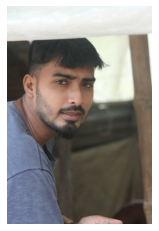

In [ ]:
import matplotlib.image as matimage
imagefilePath=matimage.imread('/content/241998905_2299601363515129_429646789482896749_n.jpg')
plt.imshow(imagefilePath)
plt.axis('off')
plt.show()

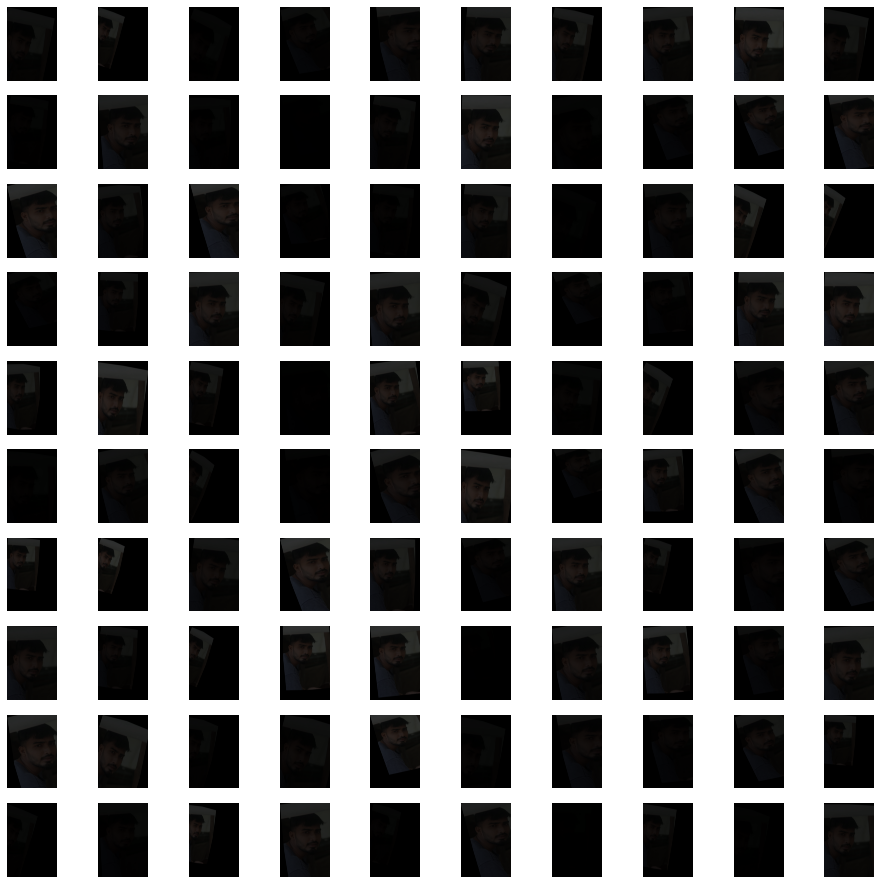

In [ ]:
gridValue1=grid.GridSpec(10,10)
gridValue1.update(wspace=0.01,hspace=0.02)
plt.figure(figsize=(16,16))
for i in range(100):
  ax1=plt.subplot(gridValue1[i])
  ax1.set_xticklabels([])
  ax1.set_yticklabels([])
  ax1.set_aspect('equal')#ratio
  image=imageTransformation(imagefilePath,20,10,5)
  plt.subplot(10,10,i+1)
  plt.imshow(image)
  plt.axis('off')
plt.show()